In [1]:
import sys
#import Backtest
from GeneralBacktest import Backtest,Position,Bid
import pandas as pd
import matplotlib.pyplot as plt
import random
import warnings
import pickle
import yfinance as yf
import pandas_ta as ta
#warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("test_data.csv",index_col = 0)
data.index = pd.to_datetime(data.index)

In [154]:
class MACD:
    def __init__(self,data):
        self.data = data
        self.macd = self.get_macd(data)
        self.signal_change = (self.macd*self.macd.shift(1)).lt(0)
        
    def get_macd(self,data):
        res = pd.DataFrame()
        for ticker in data.columns:
            macd = data.ta.macd(close=ticker, fast=12, slow=26, signal=9, append=False)
            res[ticker] = macd['MACD_12_26_9']
        res.index = data.index
        return res
    
    def get_targets(self,ti):
        buying = []
        selling = []
        
        keys = self.signal_change.loc[ti]
        keys = keys[keys>0].keys()
        
        for key in keys:
            if self.macd.loc[ti][key] > 0:
                buying.append(key)
            else:
                selling.append(key)
        
        
        print(buying,selling)
        return buying, selling
        
        
    def predict(self,ti,df,positions,cash,full_data):
#         if ti.minute == 0 or ti.minute == 30:
#             print("================={}=================".format(ti))
        bid_list = []
        buying,selling = self.get_targets(ti)
        
        for pos in positions.values():
            ret = (pos.price - pos.wa_cost_price)/pos.wa_cost_price
            if  pos.ticker in selling or ret<-0.05:
                bid = Bid(ticker = pos.ticker,shares = pos.shares,price = df.iloc[-1][pos.ticker],bid_type = 0)
                bid_list.append(bid)
                cash+=pos.shares * pos.price
        
        
        for ticker in buying:
            price = df.iloc[-1][ticker]
            amount = cash/len(buying)*0.2
            shares = amount//price
            bid = Bid(ticker = ticker, shares = shares, price = price,bid_type = 1)
            bid_list.append(bid)
        
        return bid_list
            
        

# Load sample data

In [155]:
macd = MACD(data)
macd_bt = Backtest(data, macd)
macd_bt.backtest_full()

[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
['BA', 'EXC'] ['MMM', 'UPS']
[] []
['DUK', 'NEE'] []
['CVS'] ['INTC', 'TGT', 'XOM']
['DHR'] ['BA', 'T']
['GE', 'TMO'] ['DD']
['BMY', 'GILD'] ['DUK', 'NVDA']
[] ['EXC', 'GOOG', 'GOOGL', 'KHC']
[] ['CAT', 'DOW', 'EMR', 'LOW', 'NEE', 'NKE']
[] ['CRM', 'CSCO', 'FDX', 'LIN', 'TMO']
['LIN'] []
['AMT', 'NEE'] ['AVGO', 'GM', 'HD', 'NFLX']
[] ['AAPL', 'ACN', 'BKNG', 'BMY', 'TXN']
[] ['GD', 'GS']
['ACN'] ['BAC', 'CVS', 'JNJ', 'SCHW']
['T'] ['BLK', 'MS']
['UNH'] ['C']
['BMY', 'CSCO', 'CVX', 'PFE', 'VZ'] ['DHR']
['ABBV', 'DHR'] []
['JNJ', 'MDT', 'MRK'] ['AMZN', 'CVX', 'ORCL', 'RTX']
[] ['GE', 'QCOM']
['TGT'] ['BMY']
[] ['ABBV', 'CSCO', 'DHR', 'GILD', 'JNJ', 'JPM', 'UNP']
['DHR'] ['USB']
[] ['ADBE', 'CMCSA', 'HON', 'META', 'VZ']
[] ['COF', 'COST', 'F', 'PG', 'SBUX']
['HON', 'SBUX'] ['MSFT']
['COF', 'COST', 'PG', 'USB'] []
['ABT', 'MSFT', 'TMO'] 

[] ['AMT', 'GM', 'MCD', 'MMM', 'VZ']
[] ['MET']
[] ['COST', 'LMT', 'MDT']
['BKNG', 'GM', 'MDT'] ['GILD']
#shares of 0.0 is invaild
['GD'] []
['CMCSA', 'F', 'MCD', 'MMM'] []
['CL'] []
['AXP', 'EXC'] ['MDT']
['BAC', 'C', 'CAT', 'HON', 'MDT', 'MET', 'UPS'] ['PEP']
['AMT', 'BK', 'COST', 'FDX', 'JPM', 'LMT', 'NEE', 'RTX', 'T'] ['MDT']
#shares of 0.0 is invaild
#shares of 0.0 is invaild
#shares of 0.0 is invaild
['BA', 'DUK', 'KO', 'MDT', 'MO', 'USB'] ['AMGN', 'LLY']
['AMGN', 'SO'] []
['GE', 'MDLZ', 'MRK', 'PEP', 'SCHW'] ['AMGN']
['LLY', 'PG', 'PM', 'SPG', 'WBA'] []
['VZ', 'WFC'] ['BMY']
[] ['LLY', 'PFE', 'WMT']
['BMY'] []
[] ['NFLX']
['NFLX'] []
[] ['BMY']
[] ['ABT', 'JNJ']
[] ['COST', 'MDT', 'PEP']
[] ['MRK']
[] []
['LLY', 'PEP'] []
[] []
['AMGN'] ['INTC', 'SO']
[] ['LMT', 'SBUX']
[] ['DUK', 'IBM', 'T', 'VZ']
[] ['CVX', 'EXC', 'KO', 'PEP', 'PM', 'SCHW', 'WFC']
['GILD'] ['CVS', 'DIS', 'WBA', 'XOM']
[] ['CHTR', 'CMCSA', 'COF', 'COP', 'GE', 'GILD', 'GM', 'HON', 'JPM', 'MCD', 'MDLZ', 'NEE', 'R

['TXN'] ['TMUS']
[] ['AMGN', 'AMZN', 'CL', 'DIS', 'MMM']
['MMM'] ['PYPL']
['SPG'] ['LOW', 'MMM', 'MRK']
['BLK'] ['CVS', 'MDLZ']
['AIG', 'IBM'] ['MA', 'MO']
['C', 'JPM'] []
['BAC', 'MET', 'MO', 'SCHW'] ['ABBV']
['BA', 'CVS', 'GE', 'UNP', 'USB'] ['V']
['CAT', 'DIS', 'DOW', 'MMM'] []
['DD', 'WBA'] ['SBUX', 'UNH']
['ABBV', 'UNH'] ['AXP']
['MRK'] ['BA', 'DD', 'GE']
[] ['DIS', 'TXN']
['LOW', 'MDLZ', 'NFLX'] ['CAT', 'DOW', 'MMM', 'RTX']
[] ['IBM', 'USB']
[] []
[] ['MDLZ']
['DIS', 'DOW', 'USB'] ['TGT']
['BKNG'] ['DIS', 'HD']
['DIS'] ['KO']
['GE', 'TXN'] ['BMY']
[] ['UNP']
[] ['MRK']
['AMZN', 'HD', 'KO', 'PYPL'] ['WFC']
['MRK'] ['ABBV', 'COF', 'USB']
[] ['HON', 'KO', 'MRK', 'NKE']
[] []
['SBUX'] ['DOW', 'JNJ', 'LLY', 'QCOM']
[] ['C', 'DUK', 'GE', 'UNH']
['COP', 'INTC'] []
[] ['BK', 'EMR', 'SCHW', 'WMT']
[] ['CMCSA', 'ORCL', 'PFE']
[] ['SBUX']
['UNH', 'USB'] ['BLK', 'CHTR', 'PYPL']
[] ['AAPL', 'BAC', 'GD', 'GS', 'JPM', 'USB']
[] ['CSCO', 'INTC', 'MDT', 'MET', 'PEP', 'SO', 'UNH']
['USB'] ['DIS', 

[] ['CSCO', 'DUK', 'GD', 'HON', 'LOW', 'TSLA']
['LOW'] ['GE']
['DUK'] ['LMT']
['AIG', 'BAC', 'BLK', 'MCD', 'TSLA'] []
['AXP', 'COST', 'DHR', 'EXC', 'GD', 'JPM'] []
['BK'] ['AXP', 'BLK', 'COST', 'EXC', 'MCD', 'MO']
['AXP'] ['LOW', 'UNP', 'UPS']
[] ['DUK', 'GD', 'TMUS']
[] ['AXP', 'DIS', 'GS']
['ABBV'] ['DHR']
[] ['F']
[] ['BAC', 'JPM', 'NEE', 'TGT', 'WFC', 'XOM']
[] ['AIG', 'BK', 'MET', 'PYPL', 'SO']
[] ['CVS', 'CVX', 'GM', 'MS']
[] ['WMT']
[] ['COP', 'TSLA']
['LLY'] []
[] []
[] ['ABBV', 'GILD', 'SBUX']
[] []
['COP'] []
['ABBV', 'GILD', 'SBUX'] []
['MRK', 'XOM'] ['ABBV']


# After backtest, check all historical transactions with transaction_history, a dataframe that recorded each bid, its transaction cost and pnl.

In [156]:
macd_bt.transaction_history

,dt,ticker,type,price,shares,amount,transaction_cost,pnl
0,2019-04-26,BA,1,371.871307,26.0,9668.653992,0.0,0.000000
1,2019-04-26,EXC,1,32.013447,312.0,9988.195404,0.0,0.000000
2,2019-04-30,DUK,1,79.060822,101.0,7985.142975,0.0,0.000000
3,2019-04-30,NEE,1,45.179932,177.0,7996.847900,0.0,0.000000
4,2019-05-01,CVS,1,52.443317,245.0,12848.612766,0.0,0.000000
...,...,...,...,...,...,...,...,...
2903,2022-10-07,COP,0,118.510002,177.0,20976.270378,0.0,511.529892
2904,2022-10-07,GILD,0,64.290001,83.0,5336.070076,0.0,-96.279671
2905,2022-10-07,SBUX,0,87.029999,60.0,5221.799927,0.0,-185.400238
2906,2022-10-07,MRK,0,87.599998,81.0,7095.599876,0.0,0.000000


<AxesSubplot:>

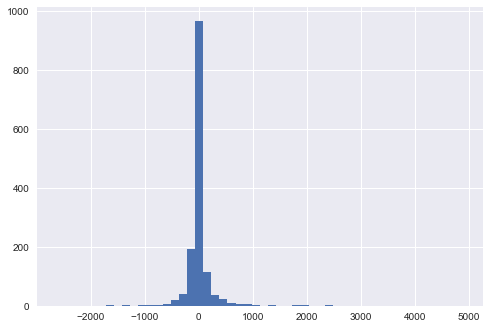

In [157]:
#histogram of pnl
macd_bt.transaction_history[macd_bt.transaction_history.type ==0]['pnl'].hist(bins = 50)

# The portfolio_tracker records the # of bids, length of positions, cash value, position value, total value at each ti. 
# The bah column is the value assuming we buy all the tickers when it begins

In [158]:
macd_bt.portfolio_tracker

,dt,bid_count,position_count,cash_value,positions_value,total_value,bah
0,2019-03-20,0,0,100000.000000,0.000000,100000.000000,100000.000000
1,2019-03-21,0,0,100000.000000,0.000000,100000.000000,100954.473649
2,2019-03-22,0,0,100000.000000,0.000000,100000.000000,99110.452320
3,2019-03-25,0,0,100000.000000,0.000000,100000.000000,99028.807052
4,2019-03-26,0,0,100000.000000,0.000000,100000.000000,99948.807689
...,...,...,...,...,...,...,...
891,2022-09-30,3,3,102464.168707,21165.540421,123629.709127,145482.006651
892,2022-10-03,0,3,102464.168707,21088.859238,123553.027945,147742.010895
893,2022-10-04,1,4,81999.428221,42111.581398,124111.009619,152403.253638
894,2022-10-05,3,7,65713.338240,58552.699959,124266.038198,151698.105409


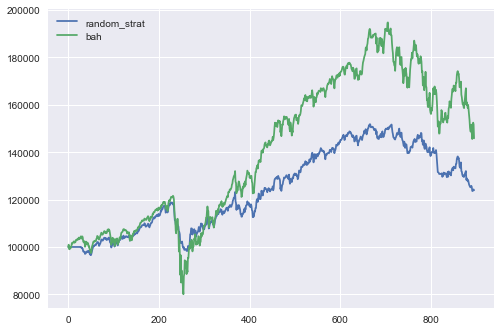

In [159]:
macd_bt.plot()

# 

# Upload to dashboard
## the upload_to_dashboard method will upload this graph to dashboard.
## make sure the crediential file "algo-trade-dashboard-80cae071e907.json" is under current directory, also install the related packages in requirements.txt

## to upload, call the function with the strategy name, if the name already exist in the gcloud, the previous data will be overwritten

In [161]:
macd_bt.upload_to_dashboard("MACD")

Data uploaded.


# Check on dashboard:
https://tigaji-algo-trade-dashboard-dashboard-gv8r0a.streamlitapp.com/